
##<font color='red'>**CEL DATA ANALYSIS TEST**</font>


>**1. BUSINESS PROBLEM**

>**2. EXPLORATORY DATA ANALYSIS**

>><font color="blue">*2.1  Overview Data* </font>

In [3]:
# Import pandas library and upload files
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving canceled_test.csv to canceled_test.csv
Saving sales_test.csv to sales_test.csv


In [4]:
# Read the dataset into notebook
## Sales_test
sales_test=pd.read_csv('sales_test.csv')
## Canceled_test
canceled_test=pd.read_csv('canceled_test.csv')

In [5]:
# View 5 top rows of Sales_test
sales_test.head()

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [6]:
# View 5 top rows of Canceled_test
canceled_test.head()

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,2017-01-03,1857566.0,10135139,1,1
1,528705,1,2017-01-03,1857566.0,10135140,1,1
2,528706,2,2017-01-03,1857566.0,10135138,1,1
3,528707,1,2017-01-03,1857566.0,10135132,1,1
4,528708,1,2017-01-03,1857566.0,10135359,1,1


In [7]:
# Information about DataFrame
sales_test.info()
canceled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order No            28315 non-null  int64  
 1   Order Date          28315 non-null  object 
 2   Line No             28315 non-null  int64  
 3   Ship To Address No  28315 non-null  float64
 4   Item Code           28315 non-null  int64  
 5   Order Qty           28315 non-null  float64
 6   Quantity Shipped    28315 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order Number        3662 non-null   int64  
 1   Line Number         3662 non-null   int64  
 2   Order Date          3662 non-null   object 
 3   Ship To Address No  3662 non-null

In [8]:
# Change data type of "Ship to Adress No" from float to int
sales_test=sales_test.astype({'Ship To Address No':int})
canceled_test=canceled_test.astype({'Ship To Address No':int})

>><font color="blue">*2.2  Cleaning Data* </font>

>>><font color='purple'> *2.2.1 Handling the missing or null values* </font>

In [9]:
# Count NA for Sales_test table
pd.isnull(sales_test).sum(axis=0)

Order No              0
Order Date            0
Line No               0
Ship To Address No    0
Item Code             0
Order Qty             0
Quantity Shipped      0
dtype: int64

In [10]:
# Count NA for Canceled_test table
pd.isnull(canceled_test).sum(axis=0)

Order Number          0
Line Number           0
Order Date            0
Ship To Address No    0
Item Code             0
Quantity Ordered      0
Quantity Canceled     0
dtype: int64

>>><font color='purple'> *2.2.2 Dropping the duplicate rows* </font>

In [11]:
# Total number of rows and columns for Sales test
sales_test.shape

(28315, 7)

In [12]:
# Rows containing duplicate data of Sales test
duplicate_row_sales_test=sales_test[sales_test.duplicated()]
print('Number of duplicate rows: ', duplicate_row_sales_test.shape)

Number of duplicate rows:  (0, 7)


In [13]:
# Using the same approach for Canceled test
## Total number of rows and columns
canceled_test.shape

(3662, 7)

In [14]:
# Rows containing duplicate data of Canceled test
duplicate_row_canceled_test=canceled_test[canceled_test.duplicated()]
print('Number of duplicate rows: ', duplicate_row_canceled_test.shape)

Number of duplicate rows:  (0, 7)


****
<font color='orange'>=> Obviously, this dataset has no missing value and duplication </font>

>><font color="blue">*2.3  Processing Data* </font>

In [15]:
# Rename some of columns for Sales_test table to match with Canceled_test one
sales_test.rename(columns={'Order No':'Order Number','Line No':'Line Number','Order Qty':'Quantity Ordered'},inplace=True)
sales_test.head()

,Order Number,Order Date,Line Number,Ship To Address No,Item Code,Quantity Ordered,Quantity Shipped
0,528758,2017-01-03,1,1358538,111931,70.0,70.0
1,528791,2017-01-03,1,1254798,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798,10106111,10.0,10.0


In [16]:
# Concatenate Canceled_test into Sales_test to get Data_test
data_test=pd.concat([sales_test,canceled_test],ignore_index=True)
data_test

,Order Number,Order Date,Line Number,Ship To Address No,Item Code,Quantity Ordered,Quantity Shipped,Quantity Canceled
0,528758,2017-01-03,1,1358538,111931,70.0,70.0,NaN
1,528791,2017-01-03,1,1254798,1029071,10.0,10.0,NaN
2,528791,2017-01-03,2,1254798,1033341,10.0,10.0,NaN
3,528791,2017-01-03,3,1254798,1040827,5.0,5.0,NaN
4,528791,2017-01-03,4,1254798,10106111,10.0,10.0,NaN
...,...,...,...,...,...,...,...,...
31972,543485,2017-02-25,8,2203715,10135140,3.0,NaN,3.0
31973,543488,2017-02-25,6,2203449,1040468,2.0,NaN,2.0
31974,543488,2017-02-25,7,2203449,1040466,1.0,NaN,1.0
31975,543491,2017-02-25,5,2203449,10135358,21.0,NaN,21.0


>><font color="blue">*2.4  Data Analysis* </font>

In [18]:
# Import libraries
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns

>>><font color='purple'> *2.4.1  Plot the daily volume over the period* </font>

Average quantity ordered per day is:  4137.5
--------------------------------------------------------------------------------------------------------------


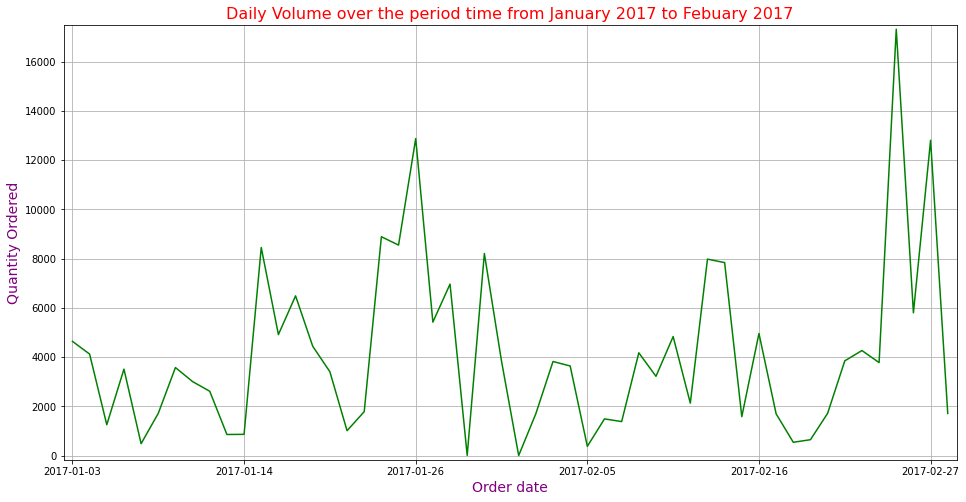

In [19]:
# Plot the daily volume over the period 
Volum_by_day=data_test.groupby('Order Date')['Quantity Ordered'].sum()
print(colored('Average quantity ordered per day is: ','blue'), round(Volum_by_day.mean(),1))
print('-'*110)
Volum_by_day.plot(color='green',figsize=(16,8),grid=True)
plt.title('Daily Volume over the period time from January 2017 to Febuary 2017', color='red',fontsize=16)
plt.xlabel('Order date',color='purple',fontsize=14)
plt.ylabel('Quantity Ordered',color='purple',fontsize=14)
plt.margins(0.01)
plt.show()

Based on the data of two first months in 2017, we realize that demand fluctuation through the quantity of orders tends to <font color='red'> increase within 1-2 weeks of the end of each month</font>.  The weeks in early-month is <font color='blue'>significantly  lower</font>.

In addition, the number of orders decreased sharply since mid-February then skyrocketed in the last week of the month.


>>><font color='purple'> *2.4.2  ABC classification of SKUs and Clients* </font>

In [99]:
# Pivot Data_test to Grou by SKU (Item Code) and Client (Address rbySKU=pd.piNo)
GrbySKU=pd.pivot_table(data_test, values=['Quantity Ordered','Quantity Shipped'], index='Item Code', aggfunc=[np.sum])
GrbyClient=pd.pivot_table(data_test,values=['Quantity Ordered','Quantity Shipped'], index='Ship To Address No', aggfunc=[np.sum])

In [100]:
# Rename columns and Sort Sum of Quantity Ordered in descending for GroupbySKU 
print(colored('Groupby SKU','blue'))
GrbySKU.columns=[''.join(col) for col in GrbySKU.columns]
GrbySKU=GrbySKU.sort_values('sumQuantity Ordered',ascending=False).reset_index()
print(GrbySKU)
print('-'*70)
print(colored('Groupby Client','blue'))
GrbyClient.columns=[''.join(col) for col in GrbyClient.columns]
GrbyClient=GrbyClient.sort_values('sumQuantity Ordered',ascending=False).reset_index()
print(GrbyClient)

Groupby SKU
    Item Code  sumQuantity Ordered  sumQuantity Shipped
0    10098739              29031.0              27173.0
1      111931              21890.0              15575.0
2     1041106              14269.0              13178.0
3     1040765              13845.0              11980.0
4      110441              10030.0               9600.0
..        ...                  ...                  ...
74    1039467                  5.0                  5.0
75   10118567                  5.0                  5.0
76   10102556                  2.0                  0.0
77    1035986                  1.0                  0.0
78   10115790                  1.0                  1.0

[79 rows x 3 columns]
----------------------------------------------------------------------
Groupby Client
     Ship To Address No  sumQuantity Ordered  sumQuantity Shipped
0               1795849              20907.0              14599.0
1               1255548              12375.0              11567.0
2        

In [101]:
# Compute Volume cumulative sum in percentage of total by SKUs and Clients
GrbySKU['%Volume in Cumsum']=round(GrbySKU['sumQuantity Ordered'].cumsum()/GrbySKU['sumQuantity Ordered'].sum()*100,1)
GrbyClient['%Volume in Cumsum']=round(GrbyClient['sumQuantity Ordered'].cumsum()/GrbyClient['sumQuantity Ordered'].sum()*100,1)

In [102]:
# Classify SKUs & Clients by ABC
## Create a function that operates on the row like so:
def f(row):
  if   row['%Volume in Cumsum'] < 80 :
        val="A"
  elif row['%Volume in Cumsum'] > 95 :
        val="C"
  else:
        val="B"
  return val
## Then apply it to GrbySKU, GrbyClient passing in the axis=1 option:
GrbySKU['Classification']=GrbySKU.apply(f, axis=1)
GrbyClient['Classification']=GrbyClient.apply(f, axis=1)

In [103]:
# Specify Number of SKUs and Clients in Cummulative sum match with %Volume in Cumsum
GrbySKU['No SKU in Cumsum']=GrbySKU.index+1
GrbyClient['No Client in Cumsum']=GrbyClient.index+1
# Perform ABC Classification on SKU and Client
ABCSKU=pd.pivot_table(GrbySKU, values=['Item Code'], index='Classification', aggfunc='count').reset_index()
ABCClient=pd.pivot_table(GrbyClient,values=['Ship To Address No'], index='Classification', aggfunc='count').reset_index()
ABCSKU['%No SKU']=round(((ABCSKU['Item Code']/ABCSKU['Item Code'].sum())*100),0)
ABCClient['%No Client']=round(((ABCClient['Ship To Address No']/ABCClient['Ship To Address No'].sum())*100),0)
ABCcategory=pd.merge(ABCSKU,ABCClient,on='Classification',how='outer')

ABC Classification of SKUs and Clients


,Classification,Item Code,%No SKU,Ship To Address No,%No Client
0,A,22,28.0,50,7.0
1,B,18,23.0,272,37.0
2,C,39,49.0,409,56.0


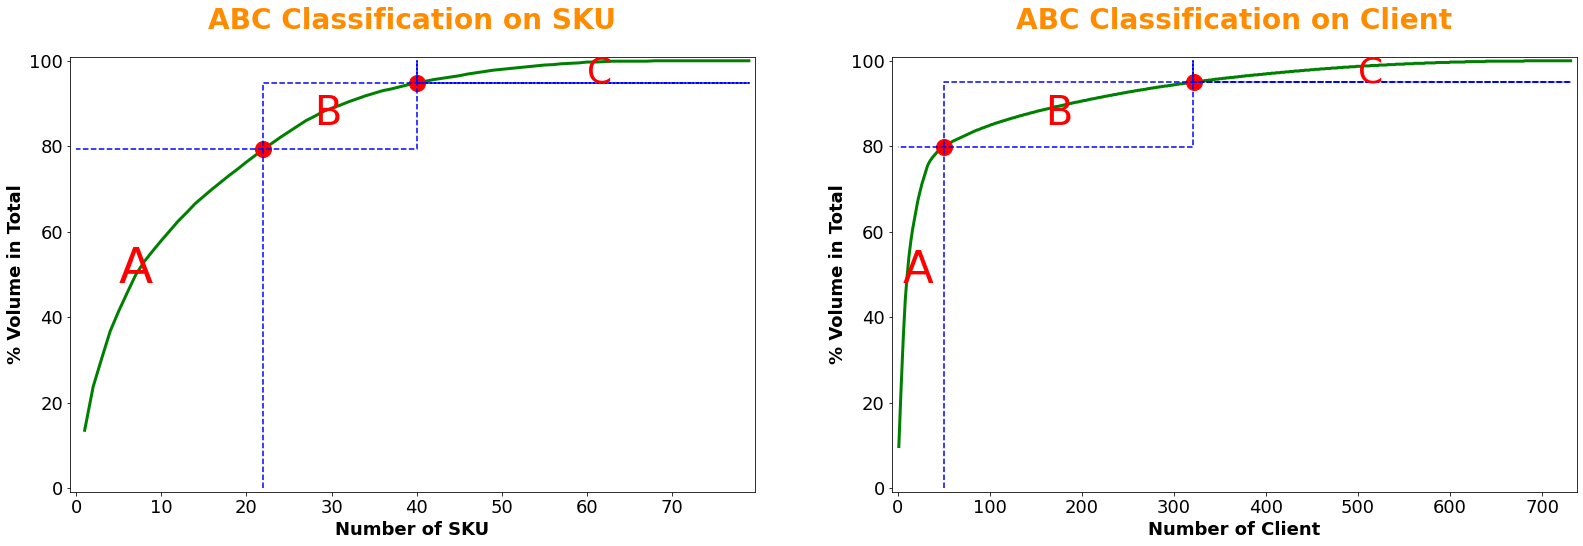

In [242]:
# Display ABC Classification of SKUs and Clients in table
print(colored('ABC Classification of SKUs and Clients','red'))
display(ABCcategory)

# Grap of ABC Classification on SKU and Client
x=GrbySKU['No SKU in Cumsum']
y=GrbySKU['%Volume in Cumsum']
z=GrbyClient['No Client in Cumsum']
t=GrbyClient['%Volume in Cumsum']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(27,8))
## Plot of SKU Classification
plt.subplot(1,2,1)
plt.plot(x,y,linestyle='-',linewidth=3, color='green')
plt.title('ABC Classification on SKU',color='darkorange',fontsize=28,fontweight='bold',y=1.05)
plt.xlabel('Number of SKU',fontsize=18, fontweight='bold')
plt.ylabel('% Volume in Total',fontsize=18,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.margins()
### Specify intersections for ABC category
x1=[22,22+18]
y1=(GrbySKU['%Volume in Cumsum'].values[[22-1,22+18-1]])
plt.plot(x1,y1, marker='o', markersize=16, color='r',
         linestyle='none')
### Plot some more auxiliary lines to help divide ABC category
x2=[22,22,22,79,40,40,40,0]
y2=[0,79.3,94.8,94.8,94.8,100,79.3,79.3]
plt.plot(x2,y2,linestyle='--',color='blue')
plt.margins(0.009)
plt.text(5,48,"A",size=50,color='red')
plt.text(28,85,"B",size=40,color='red')
plt.text(60,95,"C",size=36,color='red')

## Do the same like that to plot for Client Classification
plt.subplot(1,2,2)
plt.plot(z,t,linestyle='-',linewidth=3, color='green')
plt.title('ABC Classification on Client',color='darkorange',fontsize=28,fontweight='bold',y=1.05)
plt.xlabel('Number of Client',fontsize=18, fontweight='bold')
plt.ylabel('% Volume in Total',fontsize=18,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.margins()
### Specify intersections for ABC category
z1=[50,50+272]
t1=(GrbyClient['%Volume in Cumsum'].values[[50-1,50+272-1]])
plt.plot(z1,t1, marker='o', markersize=16, color='r',
         linestyle='none')
### Plot some more auxiliary lines to help divide ABC category
z2=[50,50,50,731,321,321,321,0]
t2=[0,79.9,95,95,95,100,79.9,79.9]
plt.plot(z2,t2,linestyle='--',color='blue')
plt.margins(0.009)
plt.text(5,48,"A",size=45,color='red')
plt.text(160,85,"B",size=40,color='red')
plt.text(500,95,"C",size=36,color='red')

plt.show()


>>><font color='purple'> *2.4.3  Compute service level by SKU and by client* </font>

In [215]:
# Caculate Service level in percentage per SKUs and Clients
GrbySKU['Service level']=round(GrbySKU['sumQuantity Shipped']/GrbySKU['sumQuantity Ordered']*100,1)
GrbyClient['Service level']=round(GrbyClient['sumQuantity Shipped']/GrbyClient['sumQuantity Ordered']*100,1)
print(colored('Service level by SKU:','blue'))
display(GrbySKU[['Item Code','Service level']])
print(colored('Service level by Client:','blue'))
display(GrbyClient[['Ship To Address No','Service level']])

Service level by SKU:


,Item Code,Service level
0,10098739,93.6
1,111931,71.2
2,1041106,92.4
3,1040765,86.5
4,110441,95.7
...,...,...
74,1039467,100.0
75,10118567,100.0
76,10102556,0.0
77,1035986,0.0


Service level by Client:


,Ship To Address No,Service level
0,1795849,69.8
1,1255548,93.5
2,1255123,98.8
3,1740542,94.1
4,1255216,63.3
...,...,...
726,1255344,100.0
727,2068671,0.0
728,1255451,100.0
729,1255436,0.0


In [186]:
# Evaluate the Service level according as 3 Rank: Low (<80%), Medium(80%-95%) and High (>95%)
## Create a function that operates on the row like so:
def f1(row):
  if   row['Service level'] < 80 :
        val="Low"
  elif row['Service level'] > 95 :
        val="High"
  else:
        val="Medium"
  return val
## Then apply it to GrbySKU, GrbyClient passing in the axis=1 option:
GrbySKU['Service Ranking']=GrbySKU.apply(f1, axis=1)
GrbyClient['Service Ranking']=GrbyClient.apply(f1, axis=1)

In [228]:
# Dertermine Percentage (%) in total quantity of SKU and Client by three Serive Ranking
RankSKU=pd.pivot_table(GrbySKU, values=['Item Code'], index='Service Ranking', aggfunc='count').reset_index()
RankClient=pd.pivot_table(GrbyClient,values=['Ship To Address No'], index='Service Ranking', aggfunc='count').reset_index()
RankSKU['SKU']=round(((RankSKU['Item Code']/RankSKU['Item Code'].sum())*100),0)
RankClient['Client']=round(((RankClient['Ship To Address No']/RankClient['Ship To Address No'].sum())*100),0)
ServiceRank=pd.merge(RankSKU,RankClient,on='Service Ranking',how='outer')
ServiceRank=ServiceRank.drop(['Item Code','Ship To Address No'],axis=1)
ServiceRank=ServiceRank.transpose()
ServiceRank.columns=ServiceRank.iloc[0]
ServiceRank=ServiceRank[1:]
ServiceRank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, SKU to Client
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   High    2 non-null      object
 1   Low     2 non-null      object
 2   Medium  2 non-null      object
dtypes: object(3)
memory usage: 64.0+ bytes


Service Ranking,High,Low,Medium
SKU,16,46,38
Client,34,14,52


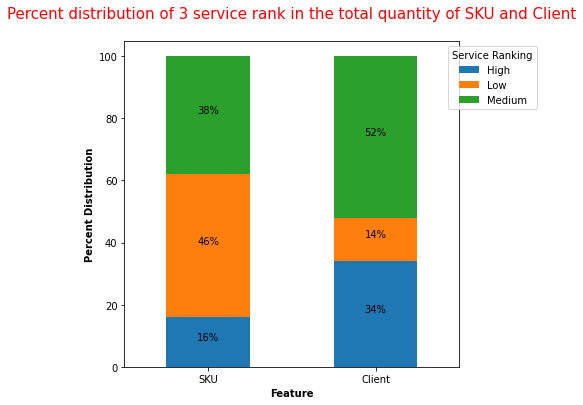

In [227]:
ServiceRank_1 = ServiceRank.plot.bar(figsize=(6,6),stacked=True, rot=0)
display(ServiceRank)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.0), title="Service Ranking")

plt.title('Percent distribution of 3 service rank in the total quantity of SKU and Client',color='red',fontsize=15,y=1.05)
plt.xlabel('Feature',fontweight='bold')
plt.ylabel('Percent Distribution',fontweight='bold')

for rec in ServiceRank_1.patches:
    height = rec.get_height()
    ServiceRank_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

In [230]:
a=pd.pivot_table(GrbySKU, values=['Service level'], index='Classification', aggfunc='mean')
b=pd.pivot_table(GrbyClient, values=['Service level'], index='Classification', aggfunc='mean')
a.columns=[''.join(col) for col in a.columns]
b.columns=[''.join(col) for col in b.columns]
a['Service level']=round(a['Service level'],0)
b['Service level']=round(b['Service level'],0)
a=a.sort_values('Classification',ascending=False).reset_index()
b=b.sort_values('Classification',ascending=False).reset_index()

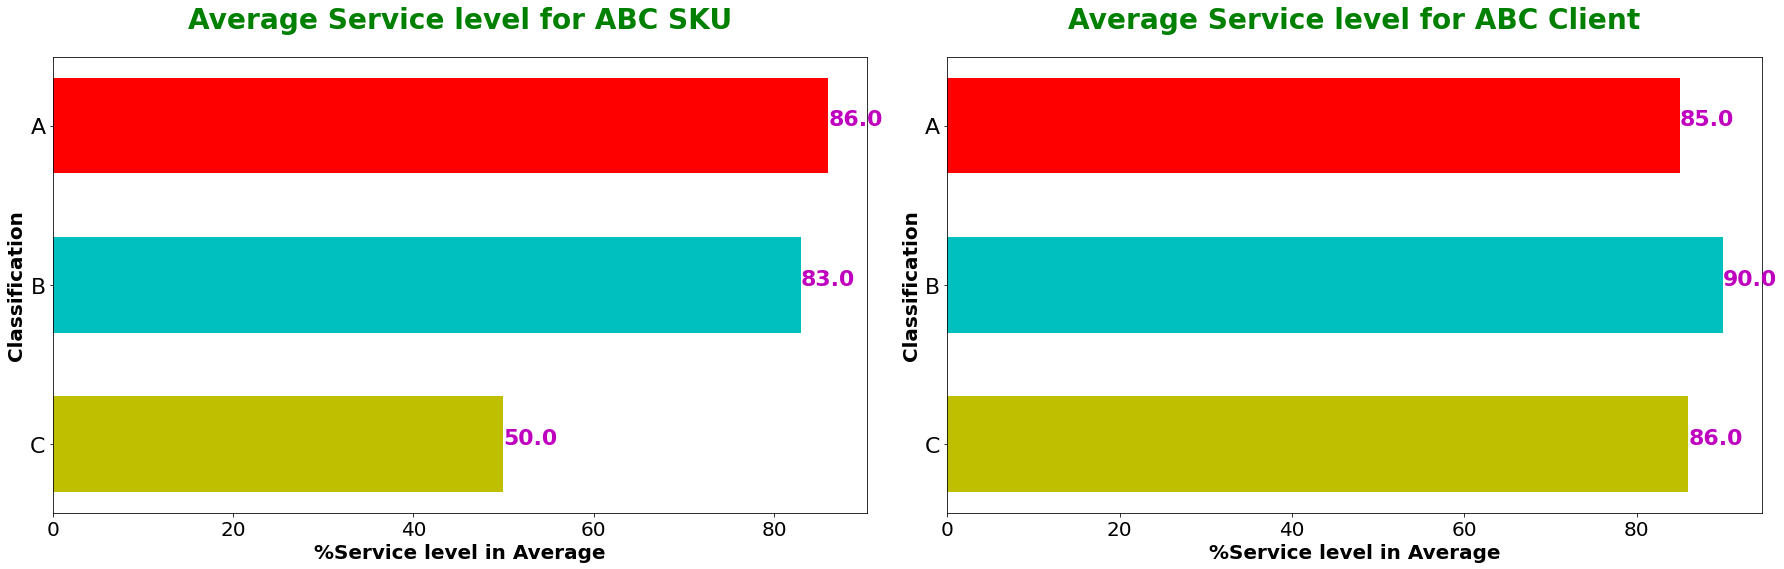

In [232]:
x=a['Classification']
y=a['Service level']
x1=b['Classification']
y1=b['Service level']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.subplot(1,2,1)
plt.barh(x,y,color=['y','c','r'],height=0.6)
plt.title('Average Service level for ABC SKU',color='g',fontsize=28,fontweight='bold',y=1.05)
plt.xlabel('%Service level in Average',fontsize=20, fontweight='bold')
plt.ylabel('Classification',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize = 22, fontweight ='bold', 
             color ='m')

plt.subplot(1,2,2)
plt.barh(x1,y1,color=['y','c','r'],height=0.6)
plt.title('Average Service level for ABC Client',color='g',fontsize=28,fontweight='bold',y=1.05)
plt.xlabel('%Service level in Average',fontsize=20, fontweight='bold')
plt.ylabel('Classification',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
for index, value in enumerate(y1):
    plt.text(value, index, str(value),fontsize = 22, fontweight ='bold', 
             color ='m')  
plt.tight_layout()

plt.show()

>**3. CONCLUSION**